Libraries Used

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline



In [15]:
df1 = pd.read_csv('C:/Users/Rathore/Downloads/Project Datasets/blackfriday/train.csv')
df2 = pd.read_csv('C:/Users/Rathore/Downloads/Project Datasets/blackfriday/test.csv')
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [16]:
df1.info()
print("-"*100)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (

In [17]:
df1.describe()



,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [18]:
df1[['Age','Purchase']].groupby(['Age'],as_index=False).mean().sort_values(by = 'Purchase',ascending =False)

,Age,Purchase
5,51-55,9534.808031
6,55+,9336.280459
3,36-45,9331.350695
2,26-35,9252.690633
4,46-50,9208.625697
1,18-25,9169.663606
0,0-17,8933.464640


In [19]:
df1[['Product_ID','Purchase']].groupby(['Product_ID'],as_index=False).mean().sort_values(by = 'Purchase',ascending =False).head()

,Product_ID,Purchase
836,P00086242,21256.505495
827,P00085342,20980.268116
1902,P00200642,20468.773234
1070,P00116142,20463.791277
1102,P00119342,20448.756494


In [20]:

p_lst = list()
for value in df1['Product_ID']:
    value = value.strip("P00")
    p_lst.append(value)
df1['Product_ID'] = p_lst
lst = list()
for value in df2['Product_ID']:
    value = value.strip("P00")
    lst.append(value)
df2['Product_ID'] = lst
df1.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,87842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,85442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


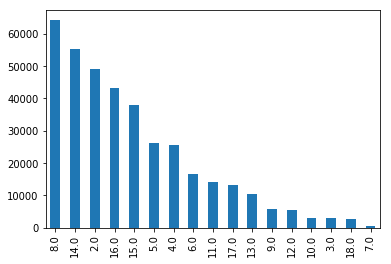

In [23]:
df1['Product_Category_2'].value_counts().plot.bar()

In [24]:
#train missing values
df1['Product_Category_2'].fillna(df1['Product_Category_2'].value_counts().index[0],inplace =True)
df1['Product_Category_3'].fillna(df1['Product_Category_3'].value_counts().index[0],inplace =True)
#test missing values
df2['Product_Category_2'].fillna(df2['Product_Category_2'].value_counts().index[0],inplace =True)
df2['Product_Category_3'].fillna(df2['Product_Category_3'].value_counts().index[0],inplace =True)
combine = [df1,df2]

city_no = {'A':0,'B':1,'C':2}
for dataset in combine:
    dataset['City_Category'] = dataset['City_Category'].map(city_no)
df1 = combine[0]
df2 = combine[1]
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,F,0-17,10,0,2,0,3,8.0,16.0,8370
1,1000001,248942,F,0-17,10,0,2,0,1,6.0,14.0,15200
2,1000001,87842,F,0-17,10,0,2,0,12,8.0,16.0,1422
3,1000001,85442,F,0-17,10,0,2,0,12,14.0,16.0,1057
4,1000002,285442,M,55+,16,2,4+,0,8,8.0,16.0,7969


In [25]:
df1[['Age','Purchase']].groupby(['Age'],as_index=False).mean().sort_values(by = 'Purchase',ascending =False)

,Age,Purchase
5,51-55,9534.808031
6,55+,9336.280459
3,36-45,9331.350695
2,26-35,9252.690633
4,46-50,9208.625697
1,18-25,9169.663606
0,0-17,8933.464640


In [26]:
df1[['Gender','Purchase']].groupby(['Gender'],as_index=False).mean().sort_values(by = 'Purchase',ascending =False)

,Gender,Purchase
1,M,9437.526040
0,F,8734.565765


In [27]:
agify = {'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}
gendrify = {'M':1,'F':0}
for dataset in combine:
    dataset['Age'] = dataset['Age'].map(agify)
    dataset['Gender'] = dataset['Gender'].map(gendrify)
df1 = combine[0]
df2 = combine[1]
combine[0].head()    
        
    

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0,10,0,2,0,3,8.0,16.0,8370
1,1000001,248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0,10,0,2,0,12,8.0,16.0,1422
3,1000001,85442,0,0,10,0,2,0,12,14.0,16.0,1057
4,1000002,285442,1,6,16,2,4+,0,8,8.0,16.0,7969


In [28]:
df1[['Stay_In_Current_City_Years','Purchase']].groupby(['Stay_In_Current_City_Years'],as_index=False).mean().sort_values(by = 'Purchase',ascending =False)

,Stay_In_Current_City_Years,Purchase
2,2,9320.429810
3,3,9286.904119
4,4+,9275.598872
1,1,9250.145923
0,0,9180.075123


In [29]:
#converting 4+ to 4 for intvalue
citymap = {'0':0,'1':1,'2':2,'3':3,'4+':4}
for dataset in combine:
    dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].map(citymap)
df1 =combine[0]
df2 = combine[1]
    
df1[['Stay_In_Current_City_Years','Purchase']].groupby(['Stay_In_Current_City_Years'],as_index=False).mean().sort_values(by = 'Purchase',ascending =False) 


,Stay_In_Current_City_Years,Purchase
2,2,9320.429810
3,3,9286.904119
4,4,9275.598872
1,1,9250.145923
0,0,9180.075123


Saving Above Preprossed data to another CSV

In [30]:
df1.to_csv('train_modified.csv')
df2.to_csv('test_modified.csv')

Importing Preprossed File


In [4]:
df = pd.read_csv('C:/Users/Rathore/Downloads/Project Datasets/blackfriday/train_modified.csv')
Train = df[df.columns[1:13]]
train,test= train_test_split(Train,test_size=0.2,random_state =10)
train_x = train.drop(['Purchase'],axis = 1)
train_y = train['Purchase']
test_x = test.drop(['Purchase'],axis = 1)
test_y = test['Purchase']
train_x.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
508812,1000366,121242,1,5,15,1,1,1,2,0.0,0.0
417315,1004207,346442,1,3,1,2,4,0,1,2.0,14.0
156569,1000176,227642,0,1,3,2,1,0,1,5.0,14.0
541086,1005324,98342,1,2,7,2,0,1,1,2.0,0.0
292192,1003065,51842,0,1,4,0,2,0,4,8.0,0.0


Gradient Boosting Regressor

In [6]:

clf1 = GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000 , min_samples_split=240,min_samples_leaf=40,max_depth=11,subsample=0.95,random_state=10 )
clf1.fit(train_x,train_y)
pred = clf1.predict(test_x)
ac = np.sqrt(mean_squared_error(test_y,pred))
ac

2478.2239035994253

Parameter Tuning

In [26]:
parameter2 = {'max_depth':(8, 9, 10 , 11),'min_samples_split':(240,340,440,500)}
gsearch2 = GridSearchCV(clf1,parameter2)
gsearch2.fit(train_x,train_y)
gsearch2.grid_scores_, gsearch2.best_params_,gsearch2.best_score_

([mean: 0.71672, std: 0.00096, params: {'max_depth': 8, 'min_samples_split': 240},
  mean: 0.71672, std: 0.00096, params: {'max_depth': 8, 'min_samples_split': 340},
  mean: 0.71718, std: 0.00084, params: {'max_depth': 8, 'min_samples_split': 440},
  mean: 0.71663, std: 0.00098, params: {'max_depth': 8, 'min_samples_split': 500},
  mean: 0.72274, std: 0.00068, params: {'max_depth': 9, 'min_samples_split': 240},
  mean: 0.72274, std: 0.00068, params: {'max_depth': 9, 'min_samples_split': 340},
  mean: 0.72243, std: 0.00077, params: {'max_depth': 9, 'min_samples_split': 440},
  mean: 0.72219, std: 0.00125, params: {'max_depth': 9, 'min_samples_split': 500},
  mean: 0.72663, std: 0.00057, params: {'max_depth': 10, 'min_samples_split': 240},
  mean: 0.72663, std: 0.00057, params: {'max_depth': 10, 'min_samples_split': 340},
  mean: 0.72659, std: 0.00071, params: {'max_depth': 10, 'min_samples_split': 440},
  mean: 0.72617, std: 0.00063, params: {'max_depth': 10, 'min_samples_split': 500},


In [30]:
parameter3 = {'min_samples_split':(240,340),'min_samples_leaf':(20,30,40)}
gsearch3 = GridSearchCV(clf1,parameter3)
gsearch3.fit(train_x,train_y)
gsearch3.grid_scores_, gsearch3.best_params_,gsearch3.best_score_

([mean: 0.72304, std: 0.00075, params: {'min_samples_leaf': 20, 'min_samples_split': 240},
  mean: 0.72168, std: 0.00091, params: {'min_samples_leaf': 20, 'min_samples_split': 340},
  mean: 0.72294, std: 0.00100, params: {'min_samples_leaf': 30, 'min_samples_split': 240},
  mean: 0.72191, std: 0.00088, params: {'min_samples_leaf': 30, 'min_samples_split': 340},
  mean: 0.72320, std: 0.00057, params: {'min_samples_leaf': 40, 'min_samples_split': 240},
  mean: 0.72172, std: 0.00097, params: {'min_samples_leaf': 40, 'min_samples_split': 340}],
 {'min_samples_leaf': 40, 'min_samples_split': 240},
 0.7232022595010941)

In [25]:
parameter5 = {'subsample':(0.95,1)}
gsearch5 = GridSearchCV(clf1,parameter5)
gsearch5.fit(train_x,train_y)
gsearch5.grid_scores_, gsearch5.best_params_,gsearch5.best_score_

([mean: 0.70874, std: 0.00077, params: {'subsample': 0.95},
  mean: 0.70874, std: 0.00030, params: {'subsample': 1}],
 {'subsample': 0.95},
 0.7087408531299961)

In [ ]:
# n_estimators=800 ac =2479.731,n_estimators= 1000  ac = 2478.22,n_estimators =1600 ac =2482.55, n_estimators= 1200 ac =2478.62,n_estimators = 1100 ac =2478.43,n_estimators =900 ac =2478.62,n_estimators =850 ac =2479.51
# n_estimators = 950 ac =2478.71

In [11]:
df_test = pd.read_csv("C:/Users/Rathore/Downloads/Project Datasets/blackfriday/test_modified.csv")
test = df_test[df_test.columns[1:13]]
test_predict = clf1.predict(test)
test_predict

array([ 15935.17251797,  10911.1810438 ,   6773.58657018, ...,
         8482.76054887,  17702.7397887 ,    853.58123979])

In [13]:
BlackFridayPrediction = pd.DataFrame()
BlackFridayPrediction ['User_ID'] = test['User_ID']
BlackFridayPrediction ['Product_ID'] = test['Product_ID']
BlackFridayPrediction ['Purchase'] = test_predict
BlackFridayPrediction.head()

,User_ID,Product_ID,Purchase
0,1000004,128942,15935.172518
1,1000009,113442,10911.181044
2,1000010,288442,6773.586570
3,1000010,145342,3300.012672
4,1000011,53842,1778.895482


In [14]:
BlackFridayPrediction.to_csv('TestSolution.csv')

Predicted CSV for submission